Thomas Dougherty

Probability and Statistics for Computer Science


### Analysis of the On-Time Performance (OTP) of New Jersey Transit Commuter Rail<br>
On-time performance refers to the level of success of a service adhering to its schedule. In this example I'll be exploring NJT commuter rail from March 2018 to March 2020. On-time performance data can be used for schedule planning, passenger information systems, and comparison to weather data. 
    

#### Data cleanup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from helper_functions import *


#all_services = helper.combine_csvs("data\\services\\")
print("Reading CSV....")
all_services = pd.read_csv('data\\all_services.csv')
all_services = helper.format_services(all_services)
all_services.head(10)

Reading CSV....
Dropping columns...
Changing datatypes...
Done formatting dataframe


,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133301,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116638,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166626,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166626,Northeast Corrdr,NJ Transit
5,2018-03-01,3805,6.0,North Elizabeth,109.0,Elizabeth,41.0,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016663,Northeast Corrdr,NJ Transit
6,2018-03-01,3805,7.0,Elizabeth,41.0,Linden,70.0,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083313,Northeast Corrdr,NJ Transit
7,2018-03-01,3805,8.0,Linden,70.0,Rahway,127.0,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,Northeast Corrdr,NJ Transit
8,2018-03-01,3805,9.0,Rahway,127.0,Metropark,83.0,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,Northeast Corrdr,NJ Transit
9,2018-03-01,3805,10.0,Metropark,83.0,Metuchen,84.0,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166626,Northeast Corrdr,NJ Transit


### Visualization of On Time Performance
There is no conventional definition of 'On Time' as it varies between agencies and modes of transportation. In this project, 'On Time' will be defined as an arrival of less than 3 minutes late. A function iterates through the data frame and classifies each arrival into one of four categories by keeping a count in a size 4 array. 

#### All Services by Year

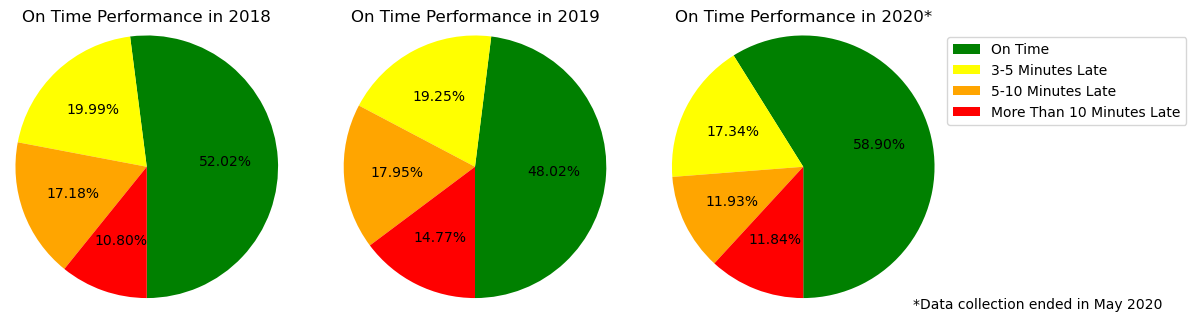

In [2]:
# Get the data for each subplot
data_2018 = helper.categorize_lateness(all_services[(all_services['date'].dt.year == 2018)])
data_2019 = helper.categorize_lateness(all_services[(all_services['date'].dt.year == 2019)])
data_2020 = helper.categorize_lateness(all_services[(all_services['date'].dt.year == 2020)])
late_labels = ['On Time', '3-5 Minutes Late', '5-10 Minutes Late', 'More Than 10 Minutes Late']
late_colors = ['green', 'yellow', 'orange', 'red']

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.pie(data_2018, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax1.title.set_text('On Time Performance in 2018')
ax2.pie(data_2019, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax2.title.set_text('On Time Performance in 2019')
ax3.pie(data_2020, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax3.title.set_text('On Time Performance in 2020*')
plt.text(1.0, -1.3, "*Data collection ended in May 2020", fontsize=10)
fig.set_figwidth(12)
plt.legend(bbox_to_anchor = (1.0, 1.0), labels = late_labels)
plt.show()

#### All Services by Season

In Autumn, tree leaves tend to fall on the rails. As they're crushed by the weight of the trains, the wheels of the train and the rails they ride on become coated in a low-friction residue. he buildup is incremental with each passing train. So unlike snow, the buildup cannot be prevented by the regular running of trains. These condition makes it difficult for trains to accelerate, decelerate, and maintain safe speeds leading to delays and other service disruptions so we can expect a lower On Time Performance during the autumn months.  

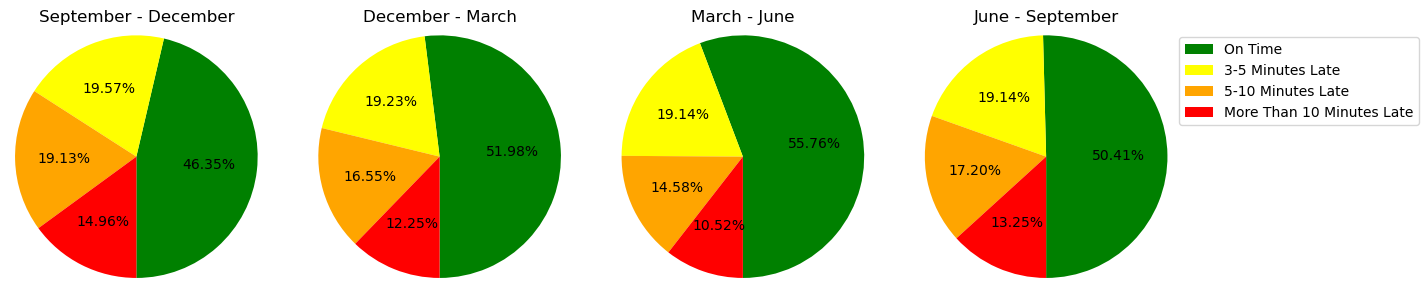

In [3]:
data_fall = helper.categorize_lateness(all_services[(all_services['date'].dt.month >= 9) & (all_services['date'].dt.month <= 12)])
# could not get a 'true' boolean value for the winter months and had to broken up into two separate dfs
df1 = all_services[(all_services['date'].dt.month <= 3)]
df2 = all_services[(all_services['date'].dt.month >= 12)]
result = pd.concat([df1,df2])
data_winter = helper.categorize_lateness(result) 
data_spring = helper.categorize_lateness(all_services[(all_services['date'].dt.month >= 3) & (all_services['date'].dt.month <=6)])
data_summer = helper.categorize_lateness(all_services[(all_services['date'].dt.month >= 6) & (all_services['date'].dt.month <=9)])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.pie(data_fall, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax1.title.set_text('September - December')
ax2.pie(data_winter, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax2.title.set_text('December - March')
ax3.pie(data_spring, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax3.title.set_text('March - June')
ax4.pie(data_summer, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax4.title.set_text('June - September')

fig.set_figwidth(15)
fig.set_figheight(5)
plt.legend(bbox_to_anchor = (1.0, 1.0), labels = late_labels)
plt.show()

##### OTP by Line

In [8]:
njt_lines = all_services['line'].unique()
njt_lines
otp_data = []
for line in njt_lines:
    otp_line = helper.categorize_lateness(all_services[all_services['line'] == line])
    otp_data.append(otp_line)
otp_data = np.asarray(otp_data)

print(otp_data)


[[528024 163908 175382 106562]
 [431937 175674 176293 162152]
 [268451 141177 104838  52828]
 [481449 197608 166501 113215]
 [299784  96019  75906  47599]
 [231509  92715  64666 116686]
 [287881 105846  75969  50670]
 [ 54680   6972   9752  38296]
 [243260 101997 101612  50050]
 [ 57267    581     52   1240]
 [209164  78984  58155  30522]]


#### Use with weather data

In [6]:
weather = pd.read_csv('data\\weather.csv')
weather = helper.format_weather(weather)
weather

Formatting weather dataframe...
Changing datatypes...
Dropping columns...
Done formatting weather dataframe


,STATION,LATITUDE,LONGITUDE,DATE,PRCP,SNOW
0,US1NJMC0040,40.292407,-74.706168,2018-03-01,0.00,0.0
1,US1NJMC0040,40.292407,-74.706168,2018-03-02,1.43,NaN
2,US1NJMC0040,40.292407,-74.706168,2018-03-03,0.72,NaN
3,US1NJMC0040,40.292407,-74.706168,2018-03-04,0.00,0.0
4,US1NJMC0040,40.292407,-74.706168,2018-03-05,0.00,0.0
...,...,...,...,...,...,...
102380,USC00289363,40.452010,-74.779110,2019-04-26,0.27,0.0
102381,USC00289363,40.452010,-74.779110,2019-04-27,0.76,0.0
102382,USC00289363,40.452010,-74.779110,2019-04-28,0.00,0.0
102383,USC00289363,40.452010,-74.779110,2019-04-29,0.02,0.0
